# Problem Statement

## Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain. 


### Task 1:-
###         Prepare a complete data analysis report on the given data.

### Task 2:-
###         Create a predictive model which will help the customers to predict future flight prices and plan their journey accordingly.

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel('Flight_Fare.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
df.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [7]:
df.duplicated().sum()

220

There are minimum number of duplicated values in the given dataset, removal of duplicated values may result in the loss of important data. we can leave them, so that we can enhance the accuracy and effectiveness of our flight fare prediction model.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are two null values present in the given dataset.

In [10]:
df.dropna(inplace=True)

we dropped the null values.

In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
date_time_col=['Date_of_Journey','Arrival_Time','Dep_Time']
for column in date_time_col:
    df[column]=pd.to_datetime(df[column])

we converted 'Date_of_Journey','Arrival_Time','Dep_Time' columns into datetime format.

In [13]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [14]:
df1 = df.copy()
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-12-22 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-12-22 05:50:00,2023-12-22 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-12-22 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-12-22 18:05:00,2023-12-22 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-12-22 16:50:00,2023-12-22 21:35:00,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2023-12-22 19:55:00,2023-12-22 22:25:00,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2023-12-22 20:45:00,2023-12-22 23:20:00,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2023-12-22 08:20:00,2023-12-22 11:20:00,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2023-12-22 11:30:00,2023-12-22 14:10:00,2h 40m,non-stop,No info,12648


Here we copied the dataset into another dataframe because we dont want to disturb the actual data.

## Converting Categorical Columns to Numerical Columns

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [16]:
df1['Airline'] = le.fit_transform(df1['Airline'])
df1['Source'] = le.fit_transform(df1['Source'])
df1['Destination'] = le.fit_transform(df1['Destination'])
df1['Total_Stops'] = le.fit_transform(df1['Total_Stops'])
df1['Route'] = le.fit_transform(df1['Route'])

In [17]:
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,2019-03-24,0,5,18,2023-12-22 22:20:00,2023-03-22 01:10:00,2h 50m,4,No info,3897
1,1,2019-01-05,3,0,84,2023-12-22 05:50:00,2023-12-22 13:15:00,7h 25m,1,No info,7662
2,4,2019-09-06,2,1,118,2023-12-22 09:25:00,2023-06-10 04:25:00,19h,1,No info,13882
3,3,2019-12-05,3,0,91,2023-12-22 18:05:00,2023-12-22 23:30:00,5h 25m,0,No info,6218
4,3,2019-01-03,0,5,29,2023-12-22 16:50:00,2023-12-22 21:35:00,4h 45m,0,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2019-09-04,3,0,64,2023-12-22 19:55:00,2023-12-22 22:25:00,2h 30m,4,No info,4107
10679,1,2019-04-27,3,0,64,2023-12-22 20:45:00,2023-12-22 23:20:00,2h 35m,4,No info,4145
10680,4,2019-04-27,0,2,18,2023-12-22 08:20:00,2023-12-22 11:20:00,3h,4,No info,7229
10681,10,2019-01-03,0,5,18,2023-12-22 11:30:00,2023-12-22 14:10:00,2h 40m,4,No info,12648


In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()# To extract the 'Date_of_Journey' column into new columns 'Day' and 'Month' for prediction purposes
df1['Day']=df1.Date_of_Journey.dt.day
df1['Month']=df1['Date_of_Journey'].dt.month

In [19]:
# To extract the 'Dep_time' column into new columns 'Dep_hour' and 'Dep_min for prediction purposes
df1['Dep_Hour']=df1['Dep_Time'].dt.hour
df1['Dep_Minute']=df1['Dep_Time'].dt.minute

In [20]:
# To extract the 'Arrival_time' column into new columns 'Arr_hour' and 'Arr_min for prediction purposes
df1['Arr_Hour']=df1['Arrival_Time'].dt.hour
df1['Arr_Minute']=df1['Arrival_Time'].dt.minute

In [21]:
df1['Duration']=pd.to_timedelta(df['Duration']).dt.total_seconds()
df1['Duration_minute']=df1['Duration']/60

In [22]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute,Duration_minute
0,3,2019-03-24,0,5,18,2023-12-22 22:20:00,2023-03-22 01:10:00,10200.0,4,No info,3897,24,3,22,20,1,10,170.0
1,1,2019-01-05,3,0,84,2023-12-22 05:50:00,2023-12-22 13:15:00,26700.0,1,No info,7662,5,1,5,50,13,15,445.0
2,4,2019-09-06,2,1,118,2023-12-22 09:25:00,2023-06-10 04:25:00,68400.0,1,No info,13882,6,9,9,25,4,25,1140.0
3,3,2019-12-05,3,0,91,2023-12-22 18:05:00,2023-12-22 23:30:00,19500.0,0,No info,6218,5,12,18,5,23,30,325.0
4,3,2019-01-03,0,5,29,2023-12-22 16:50:00,2023-12-22 21:35:00,17100.0,0,No info,13302,3,1,16,50,21,35,285.0


We extracted 'Day' & 'Month' from "Date_of_Journey" column, 'Dep_Hour' & 'Dep_Minute' from "Dep_Time" column, 'Arr_Hour' & 'Arr_Minute' from "Arrival_Time" column. And we converted 'Duration' into "Duration_Minute". Now we can drop these ('Date_of_Journey' , 'Dep_Time' , 'Arrival_Time' , 'Duration') columns.

In [23]:
# List of columns to be dropped
columns_to_drop = ['Date_of_Journey','Dep_Time','Arrival_Time','Duration']

In [24]:
df1.drop(columns=columns_to_drop, inplace=True)

In [25]:
df1['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

By analyzing the above data, we get to know that here 'No info' has more than 80% of data so it doesn't contain much information
hence we are dropping this column.

In [26]:
df1.drop('Additional_Info',inplace=True,axis=1)

## Data Visualisation and Analysis

<Axes: >

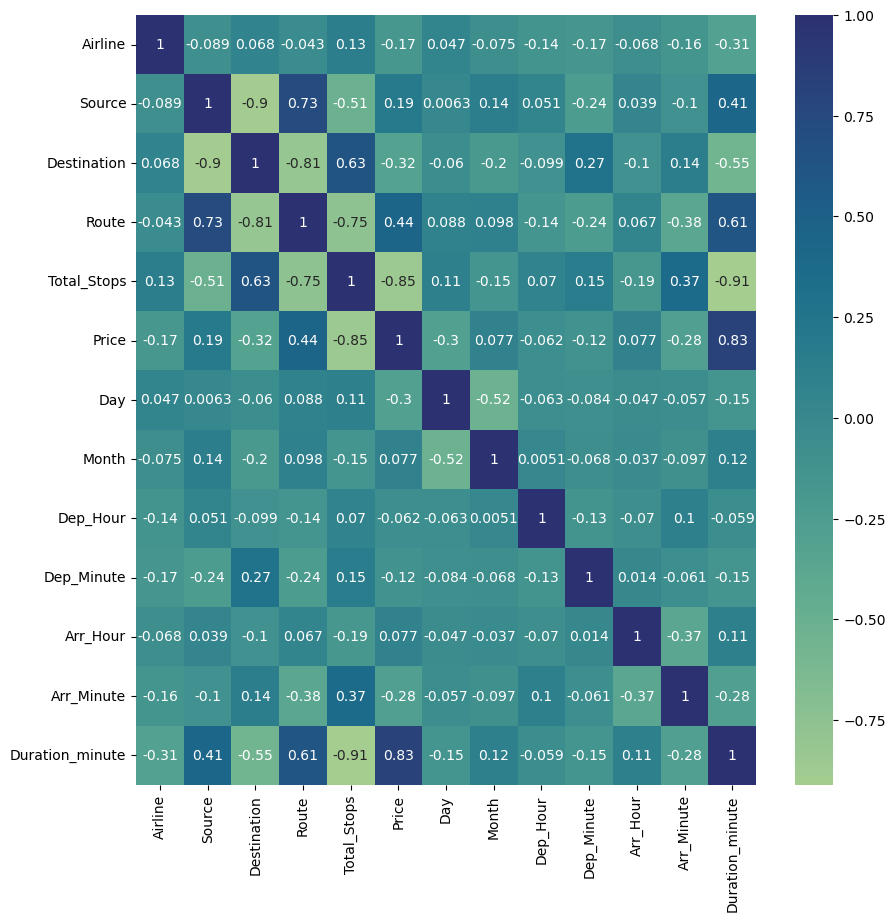

In [27]:
import seaborn as sns
plt.figure(figsize=(10,10))
corr = df1.corr()
sns.heatmap(corr.corr(),cmap='crest',annot=True)

Based on the heatmap we can see that no columns are correlated with the price column.

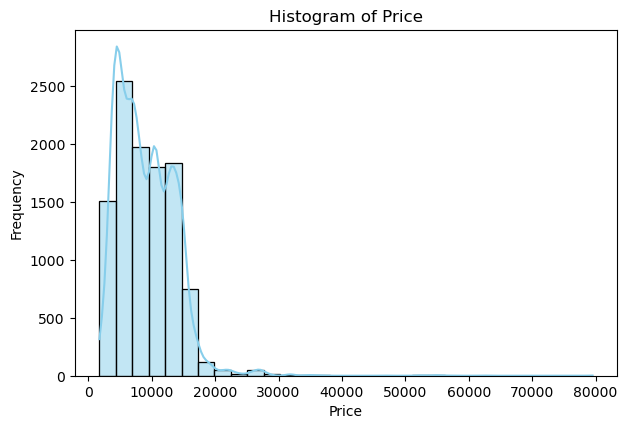

In [28]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Create histograms for numerical features
plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(2, 2, numerical_features.get_loc(feature) + 1)
    sns.histplot(df[feature], bins=30, kde=True, color='skyblue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Based on the graph we can see most number of people are choosing 10,000 price range and it is better if they work on this price range.

In [30]:
#most used route
most_used_route = df['Route'].value_counts().idxmax()
print(most_used_route)

#less used route
less_used_route = df['Route'].value_counts().idxmin()
print(less_used_route)

DEL → BOM → COK
BOM → RPR → VTZ → HYD


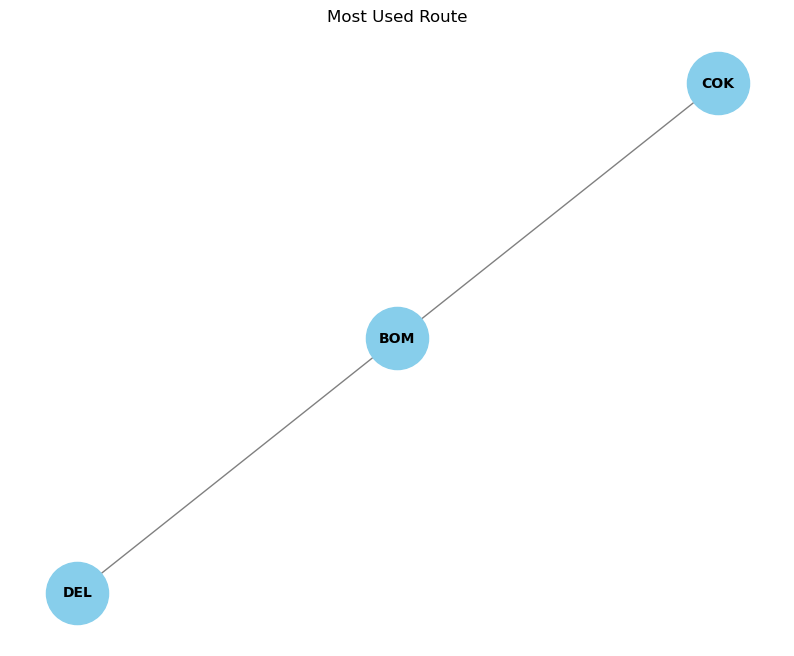

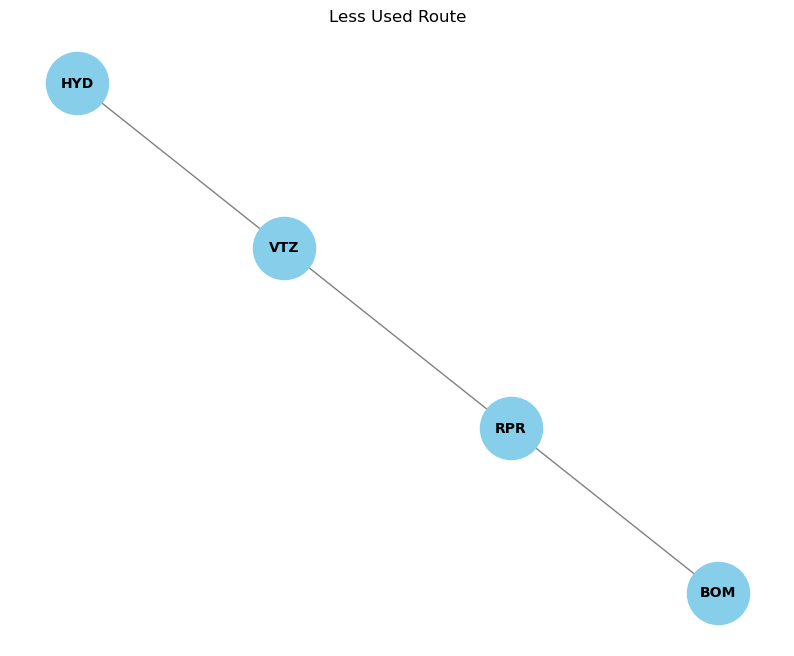

In [31]:
#Visualisation for Most used route
import networkx as nx

# Assuming 'route' is a single route string
route = "DEL → BOM → COK"

stops = route.split(' → ')
G = nx.Graph()
G.add_nodes_from(stops)
edges = [(stops[i], stops[i + 1]) for i in range(len(stops) - 1)]
G.add_edges_from(edges)

fig, ax = plt.subplots(figsize=(10, 8))  # Use 'fig, ax' instead of 'plt'
pos = nx.spring_layout(G)  # You can try different layout options
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', edge_color='gray', ax=ax)
ax.set_title('Most Used Route')  # Use 'ax.set_title' instead of 'plt.title'
plt.show()


#Visualisation for less used route

# Assuming 'route' is a single route string
route = "BOM → RPR → VTZ → HYD"

stops = route.split(' → ')
G = nx.Graph()
G.add_nodes_from(stops)
edges = [(stops[i], stops[i + 1]) for i in range(len(stops) - 1)]
G.add_edges_from(edges)

fig, ax = plt.subplots(figsize=(10, 8))  # Use 'fig, ax' instead of 'plt'
pos = nx.spring_layout(G)  # You can try different layout options
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', edge_color='gray', ax=ax)
ax.set_title('Less Used Route')  # Use 'ax.set_title' instead of 'plt.title'
plt.show()


As the countplot of Route is unclear, we used max and min to check which is the highest used route, which is the less used route and showed it in a visual manner.

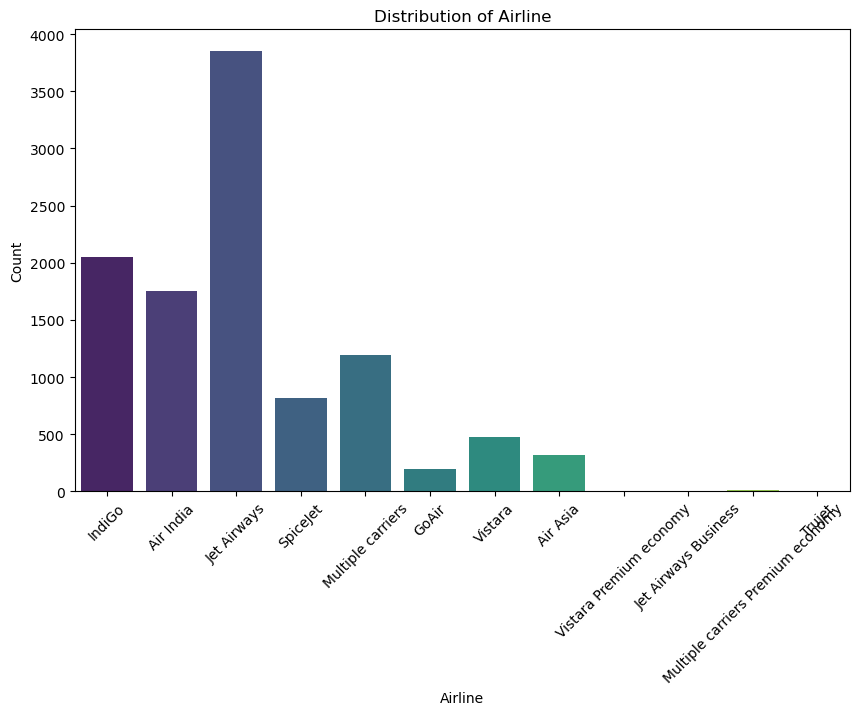

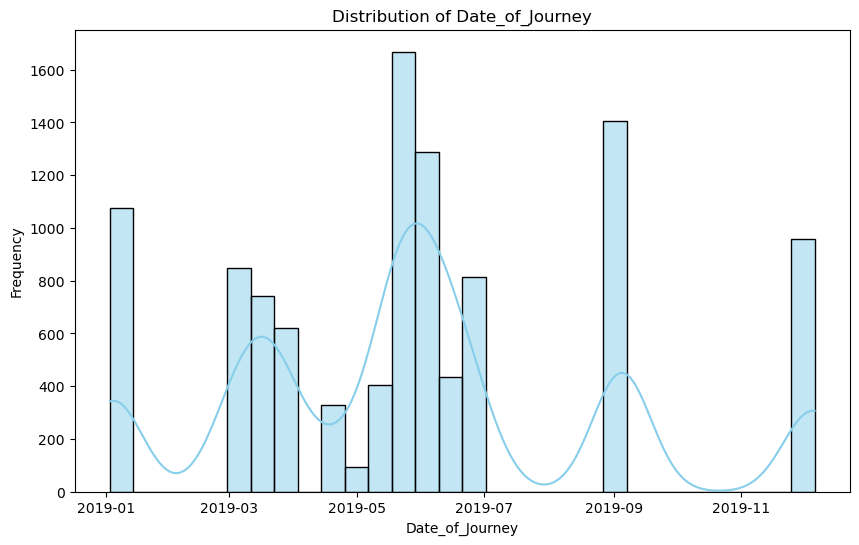

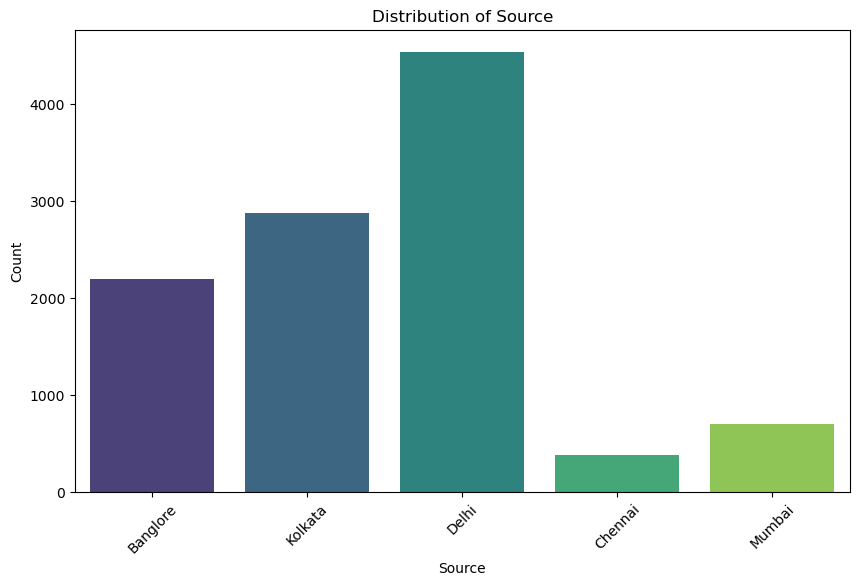

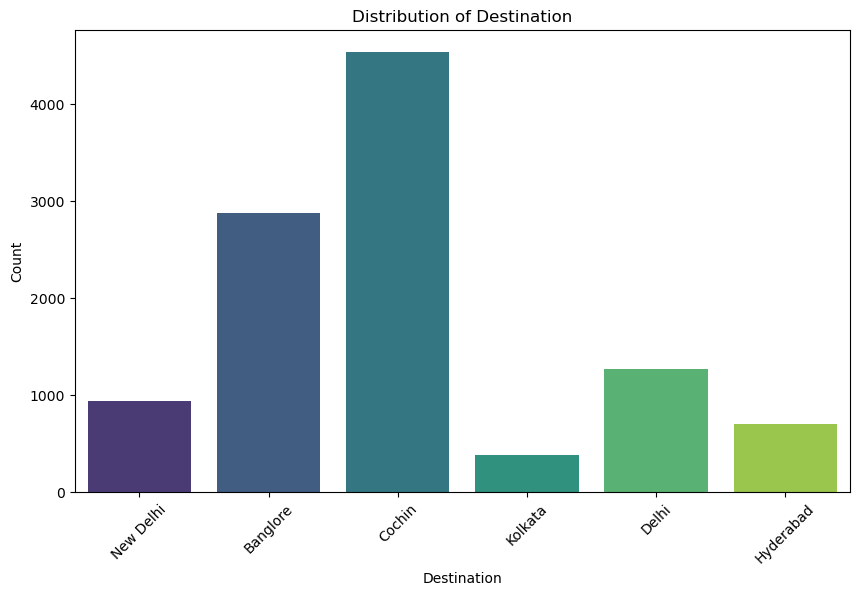

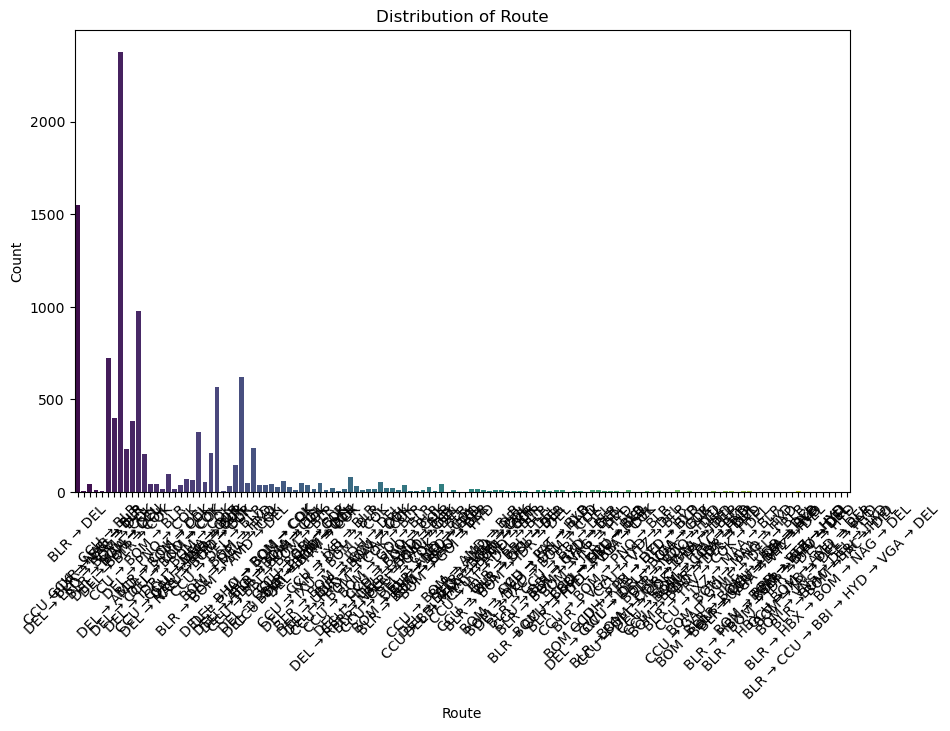

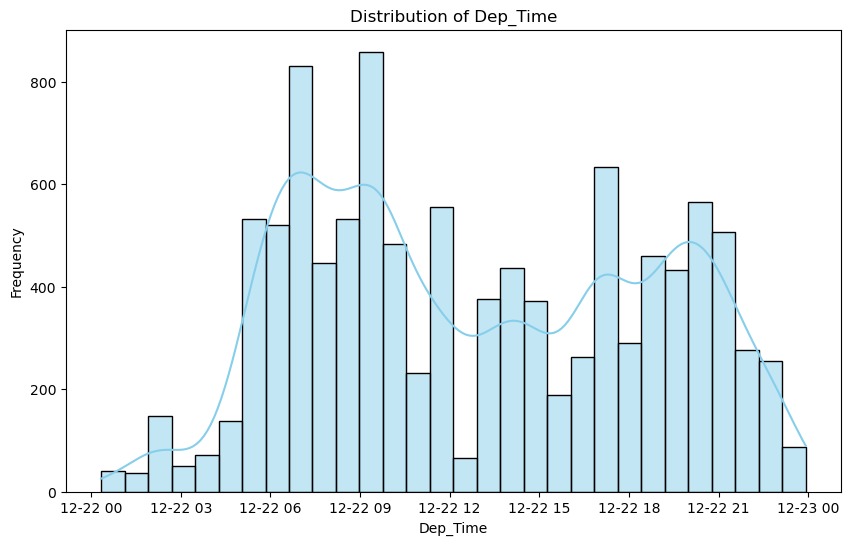

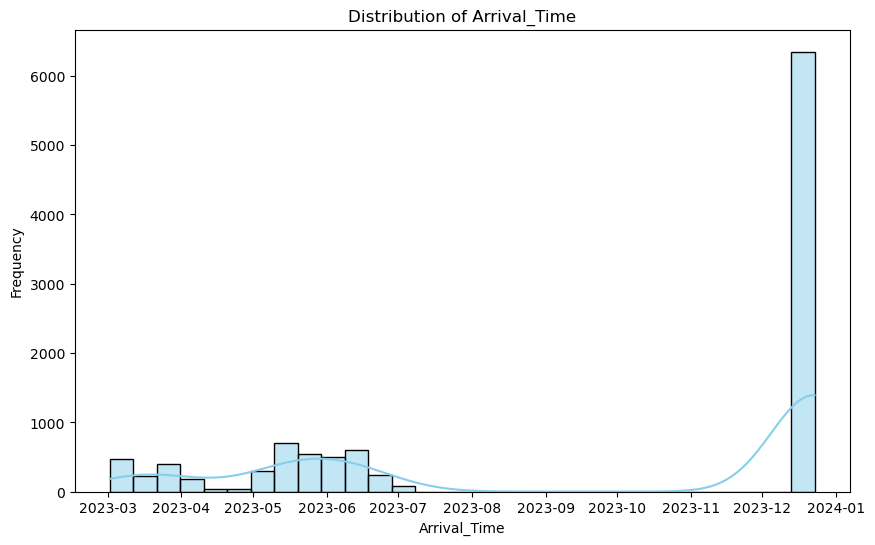

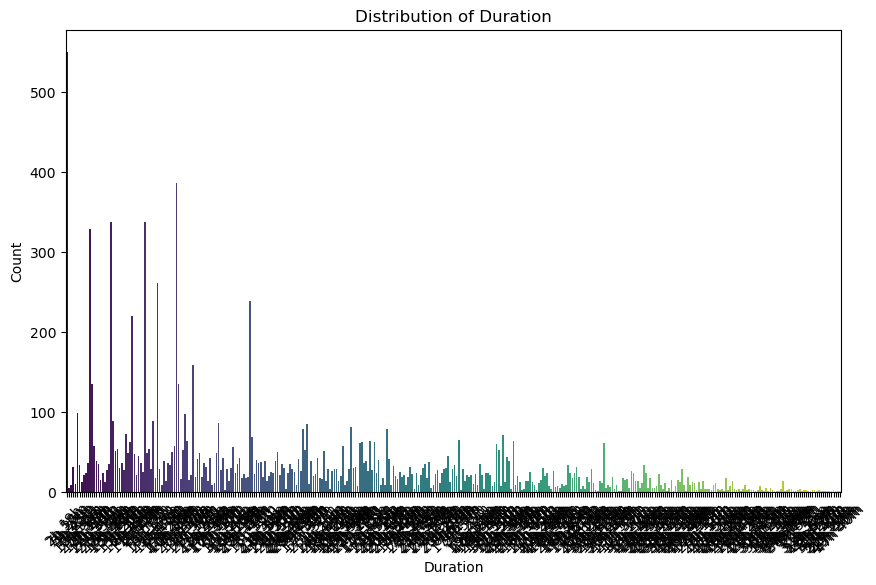

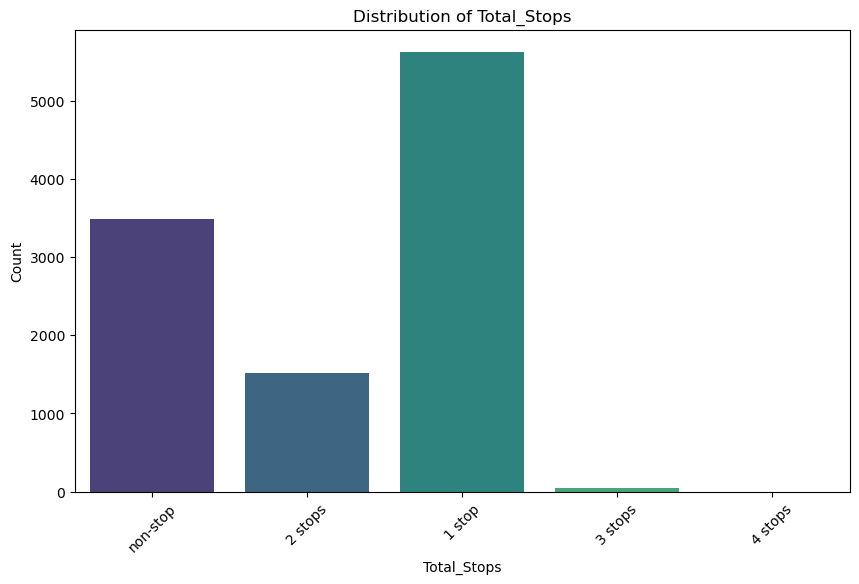

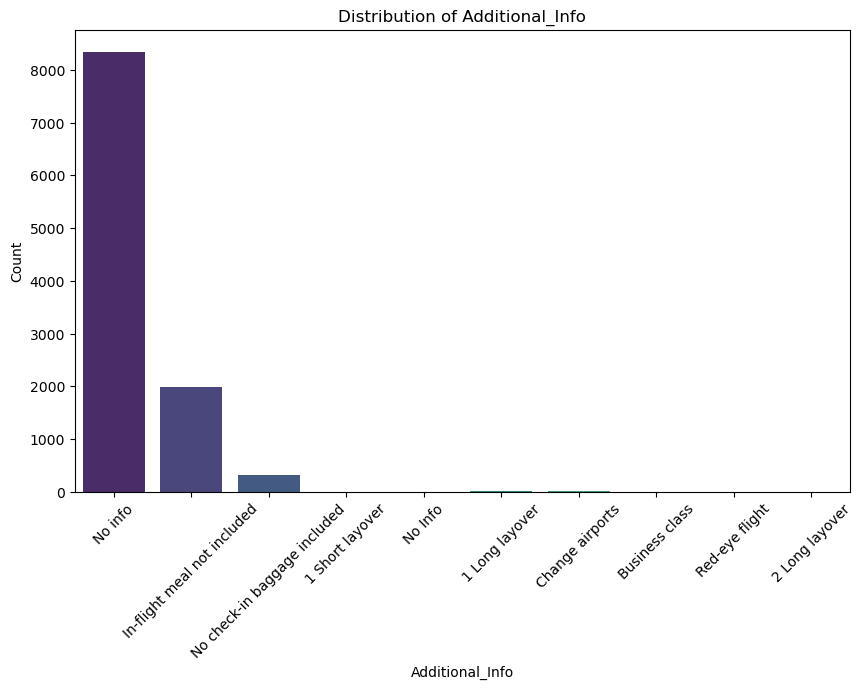

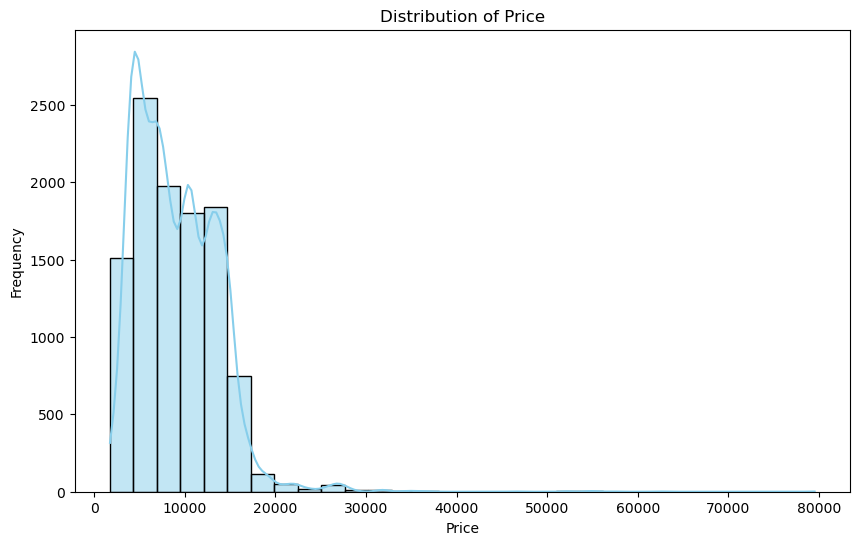

In [32]:
for column in df.columns:
    if df[column].dtype == 'O':
        # For categorical features, use bar plots
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, data=df, palette='viridis')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()
    else:
        # For numerical features, use histograms
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], bins=30, kde=True, color='skyblue')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

### Insights:

Insights for Airlines:
          * The most number of Airlines that the passengers preferred is Jet Airways.
          * The least number of Airlines that the passengers preferred is Trujet.

Insights for Source:
          * The most number of pasengers are from Delhi.
          * And the least number of passengers are from Chennai. 
          * More than 4000 passengers are from Delhi.
          
Insights for Destination:
          * The more number of passengers visited to cochin.
          * The least number of passengers visited to kolkata.
          * More than 40% of the pasengers visited to cochin.
          
Insights for Route:
          * About 2376 passengers travelled through DEL-BOM-COK route followed by 1552 passengers travelled through BLR-DEL                 route.
          * Remaining passengers didn't travel in specific route, they are more likely to travel in different routes.
          
Insights for Total Stops:
          * The most number of passengers were boarded on 1 stop Airlines.
          * The least number of passengers were boarded on 4 stop Airlines.
          * Passengers are more likely to board on 1 stop Airlines when comparing non-stop Airlines.
          
Insights for Additional Info:
          * "No info" is the most common additional information in the dataset, with 8,345 occurrences.
          * "In-flight meal not included" is the second most frequent, appearing 1,982 times.
          * "No check-in baggage included" is relatively less common, with 320 instances.
          * Other additional information categories, such as "1 Long layover", "Change airports", "Business class", "No Info",               "1 Short layover", "Red-eye flight" and "2 Long layover" are rare, with very few occurrences.

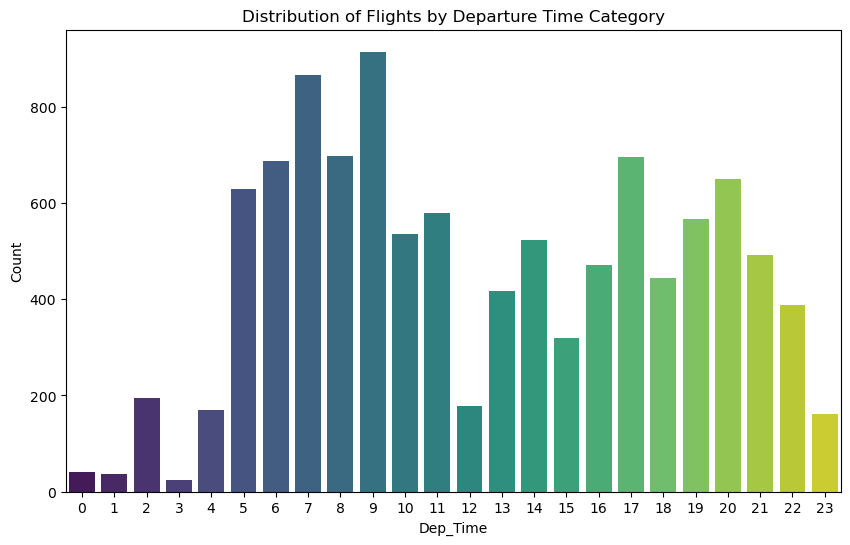

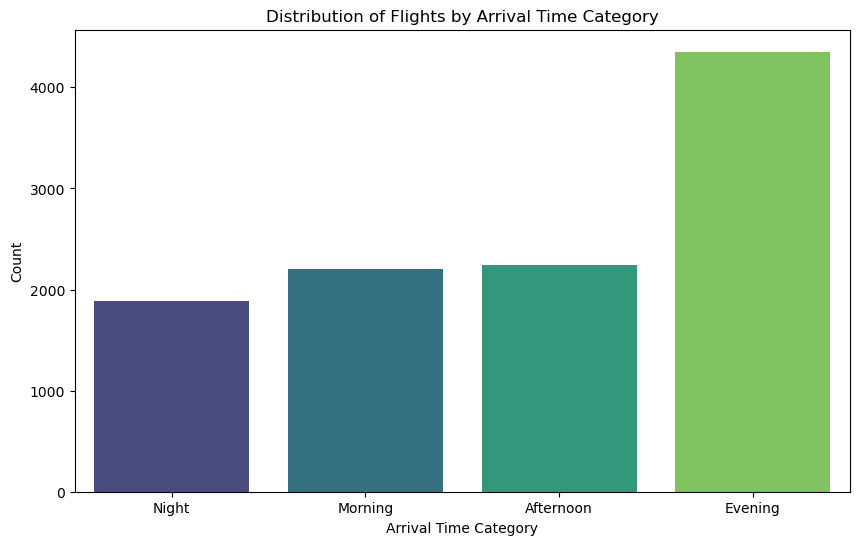

In [33]:
df['Departure_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
df['Departure_Time_Category'] = pd.cut(df['Departure_Hour'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(x='Departure_Hour', data=df, palette='viridis')
plt.title('Distribution of Flights by Departure Time Category')
plt.xlabel('Dep_Time')
plt.ylabel('Count')
plt.show()

df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
df['Arrival_Time_Category'] = pd.cut(df['Arrival_Hour'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(x='Arrival_Time_Category', data=df, palette='viridis')
plt.title('Distribution of Flights by Arrival Time Category')
plt.xlabel('Arrival Time Category')
plt.ylabel('Count')
plt.show()

From the graph which is based on Departure time we can say that most of the departures are happening at "09:00" and based on the arrival graph we can say that most of the arrival time is in the "Evening"

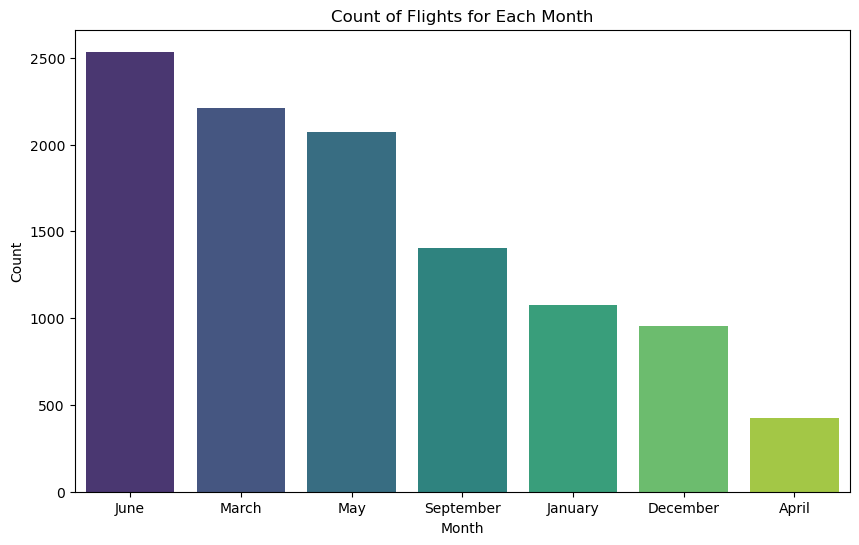

In [34]:
# Assuming df is your DataFrame
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

# Extract month from the 'Date_of_Journey' column
df['Month'] = df['Date_of_Journey'].dt.month_name()

# Plot the count of flights for each month
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df, palette='viridis', order=df['Month'].value_counts().index)
plt.title('Count of Flights for Each Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

Based on this graph we can say that June is the higest month people are travelling on the flight.

## Visualisation and Analysis Based on Price 

In [ ]:
#Boxplot
plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(2, 2, numerical_features.get_loc(feature) + 1)
    sns.boxplot(x=df1[feature], color='salmon')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

Based on this we can say the outliers are starting after 30,000 price range

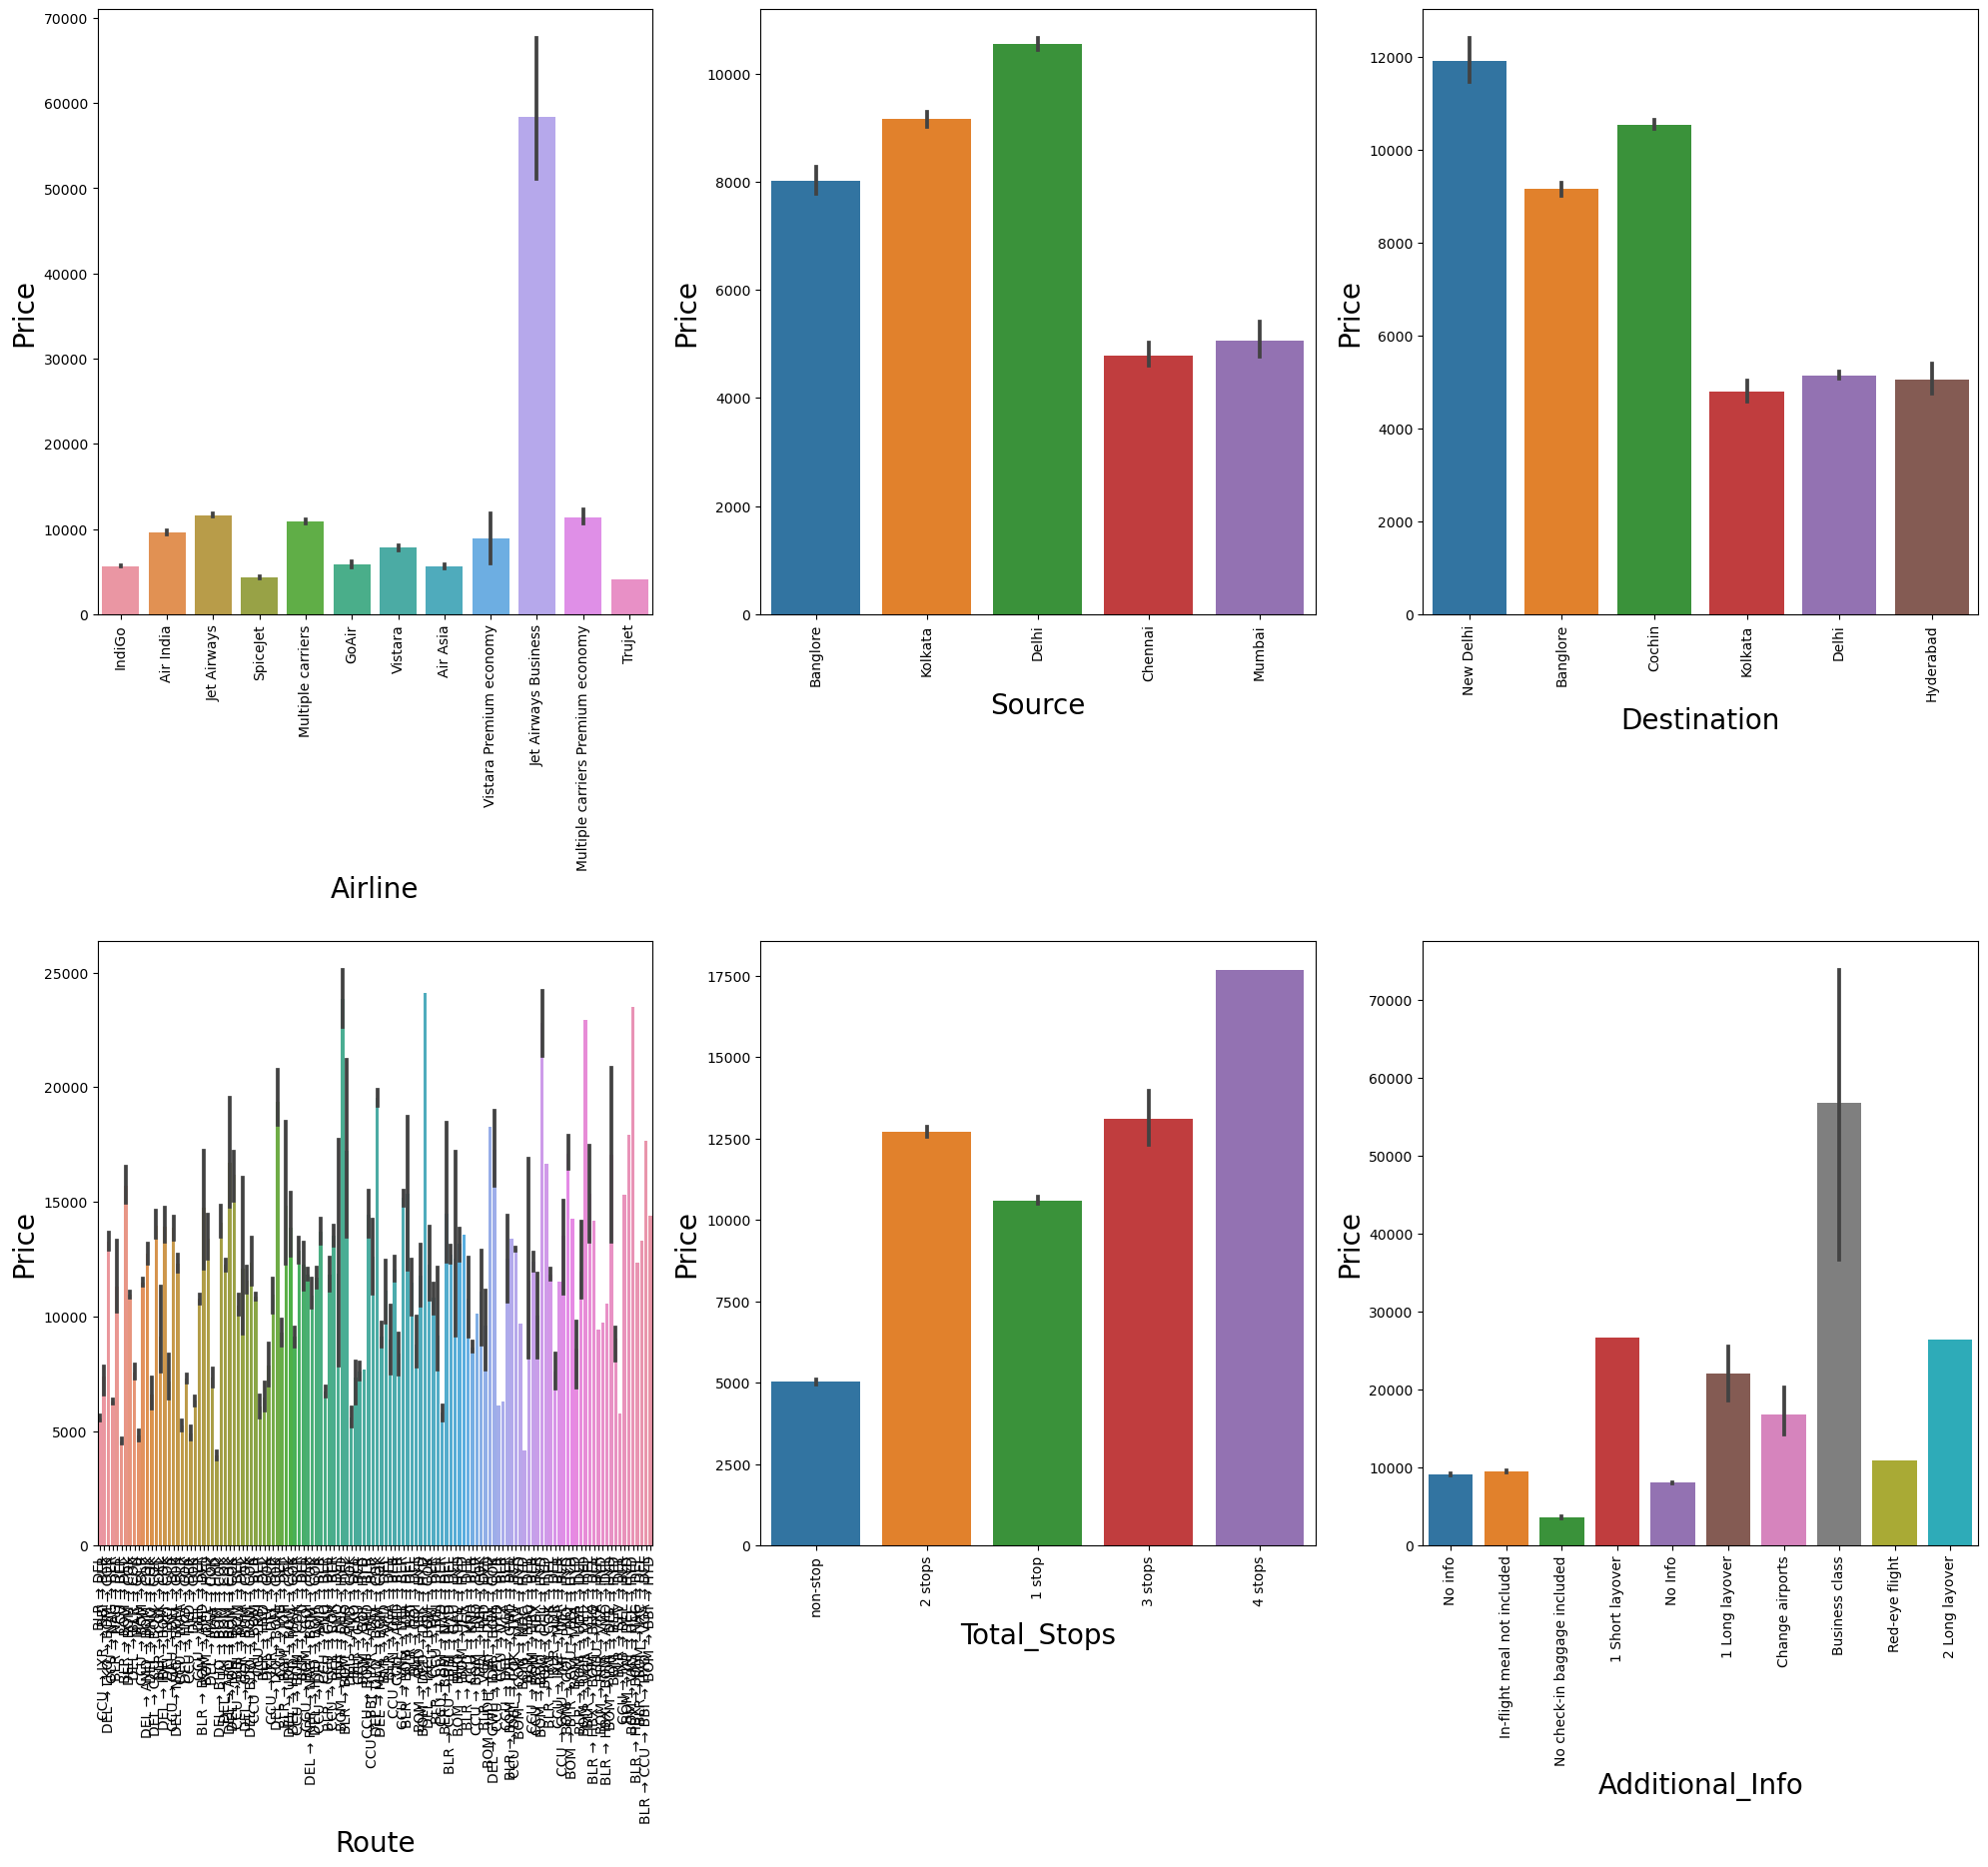

In [35]:
# List of categorical features
categorical_columns = df[['Airline','Source','Destination','Route','Total_Stops','Additional_Info']]

# barplot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in categorical_columns:
        ax= plt.subplot(3,3,plotnumber)
        sns.barplot(x=df[column],y=df['Price'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
        plt.xticks(rotation=90)
        plotnumber+=1
plt.tight_layout()

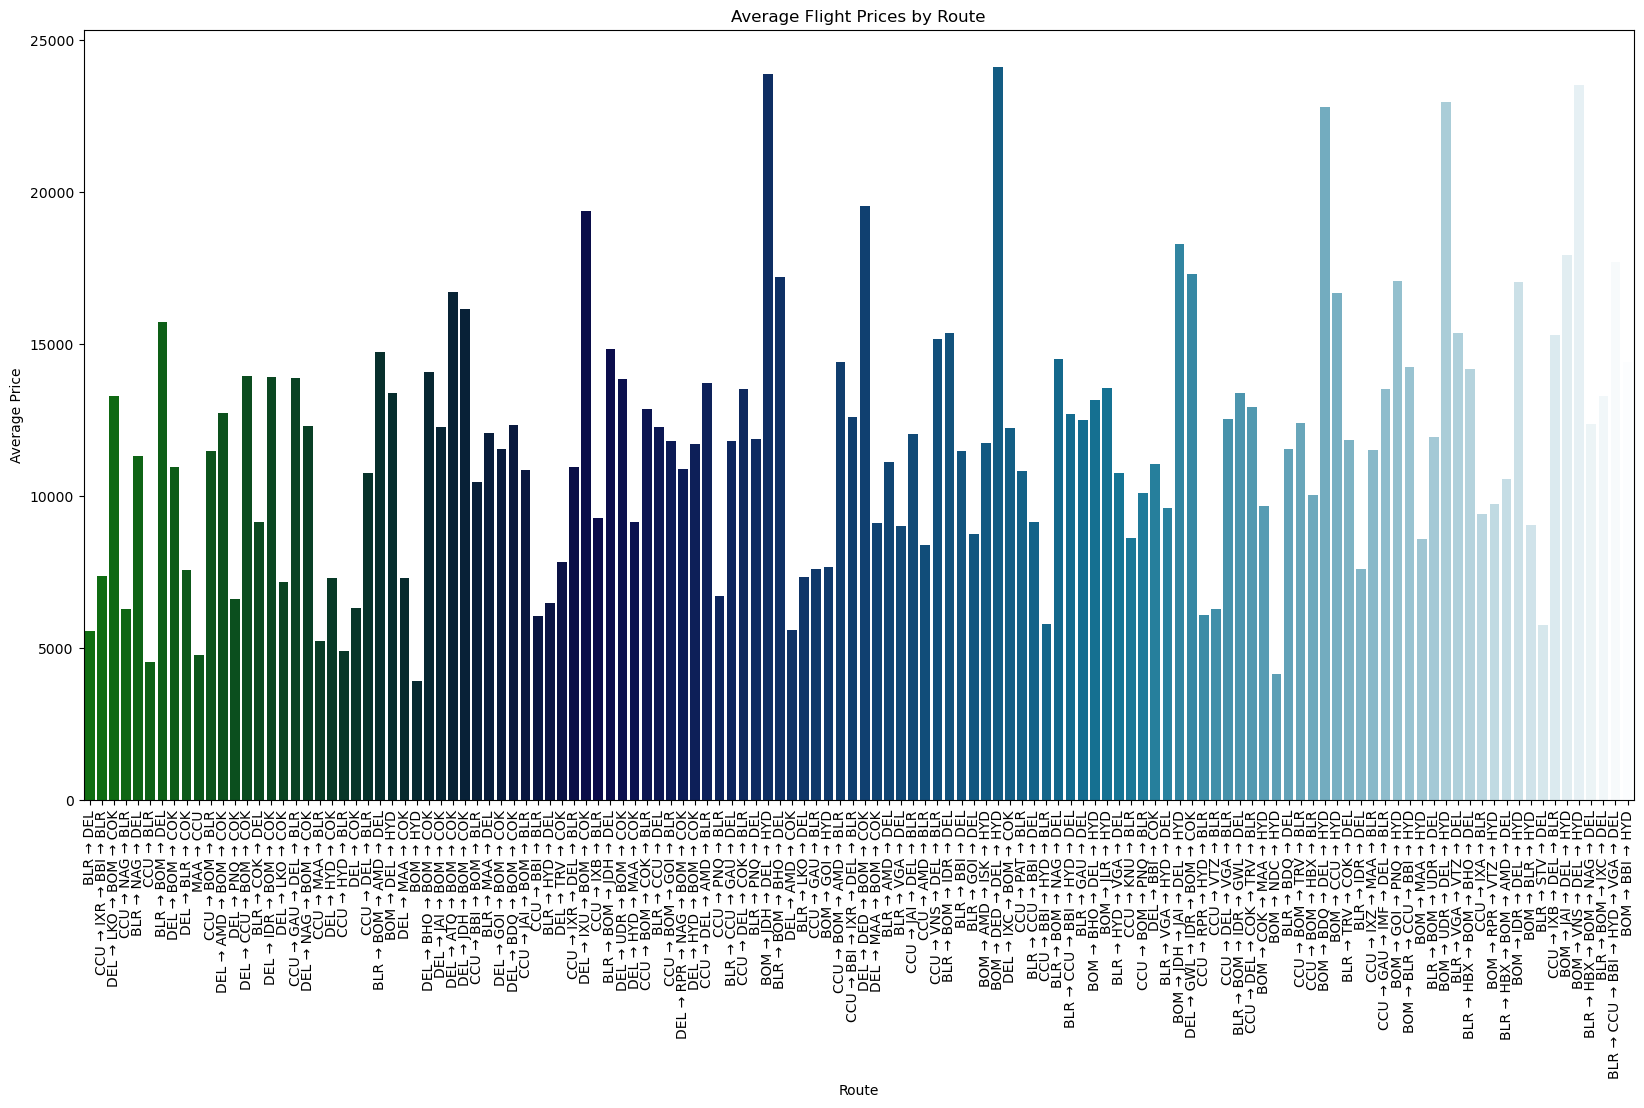

In [36]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Route', y='Price', data=df, ci=None, palette='ocean')
plt.title('Average Flight Prices by Route')
plt.xlabel('Route')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

### Insights:

Insights for Airline based on price:
          * Jet Airways Business Airlines ticket seems to have a significantly high price comparing other Airlines.
          * Trujet Airlines tickets has a relatively low price comparing to other Airlines.

Insights based on Price for Source:
           * Cost of tickets are higher in Delhi when comparing to other places.
           * Cost of tickets are low in chennai followed by Mumbai.
           
Insights based on Price for Destination:
           * New Delhi appears to have a higher price range comparing to other places.
           * Kolkata has a low price range comparing to other places.

Insights based on Price for Route:
           * BOM-DED-DEL-HYD route has higher price followed by BOM-JDH-DEL-HYD route.
           * BOM-HYD route has the least price.
Insights for total stops based on Price:
           * 4 Stops airlines tends to have a higher price which indicates that the distance is quiet long.
           * Non-stop airlines tends to have a low price which indicates that the distance is short.          
          
Insights for Additional info based on Price:
          * Business class tickets tends to have a higher price than the other tickets.

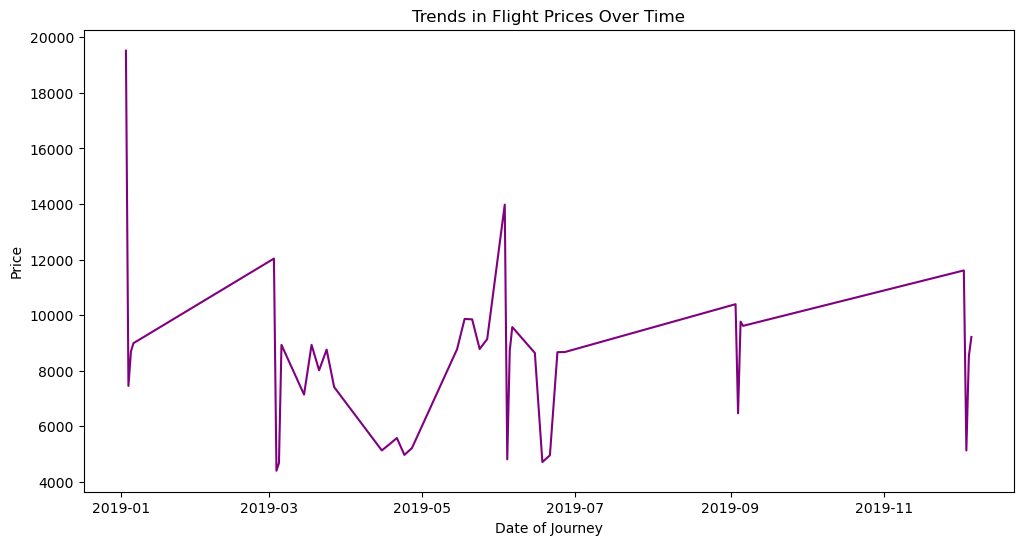

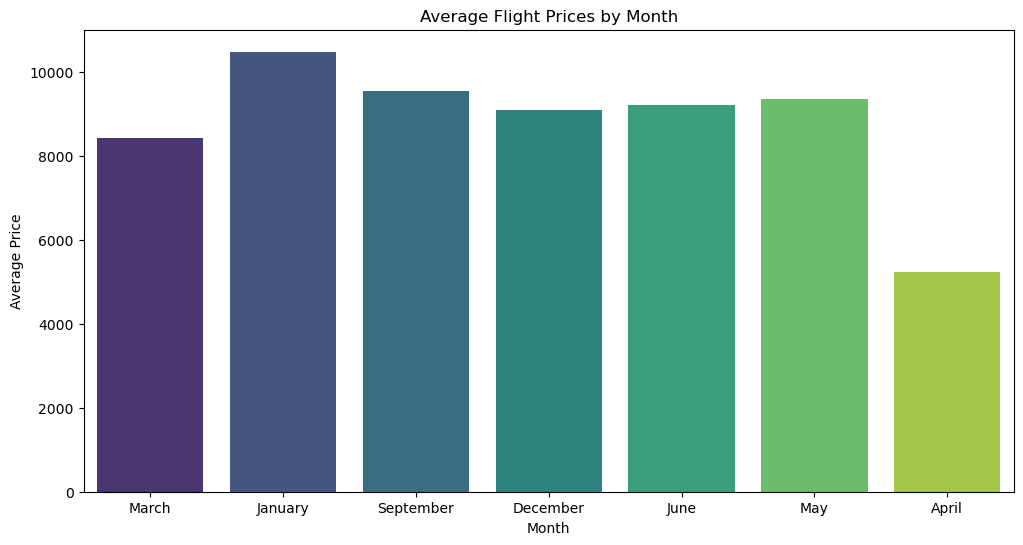

In [37]:
# Explore trends and patterns in flight prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date_of_Journey', y='Price', data=df, ci=None, color='purple')
plt.title('Trends in Flight Prices Over Time')
plt.xlabel('Date of Journey')
plt.ylabel('Price')
plt.show()

# Explore average prices by month
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Price', data=df, ci=None, palette='viridis')
plt.title('Average Flight Prices by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()

Based on the Trends in Flight Prices Over Time we can see that highest price was recored in the year "2019-01" and least price is recorded in the year "2019-03", based on Average Flight Prices by Month we can see that highest price is in "January" and least price is in "April"

# Scaling the Values and separating independent to x and dependent to y

In [38]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()
# Split X and Y
X = df1.drop(columns = ['Price'],axis=1) # Independent variables
y = df1['Price'] # Dependent / target variable

In [39]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(X, y)

# Transform the data
X_std = scaler.transform(X)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

# Linear Regression Model

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
from sklearn.metrics import mean_squared_error,r2_score

In [44]:
lr= LinearRegression() #model intializtion
lr.fit(X_train,y_train)

LinearRegression()

In [45]:
lr_pred = lr.predict(X_test)
lr_r2_score=r2_score(y_test,lr_pred)
print(lr_r2_score)

0.4339082882621682


In [46]:
rmse = np.sqrt(mean_squared_error(y_test, lr_pred)) #RSME
print(rmse)
print(mean_squared_error(y_test, lr_pred))
lr.intercept_ #bo

3395.1567193368855
11527089.148858404


10886.41740640641

Cross-Validation Scores: [0.42340028 0.42059042 0.35395098 0.40932671 0.40474579]


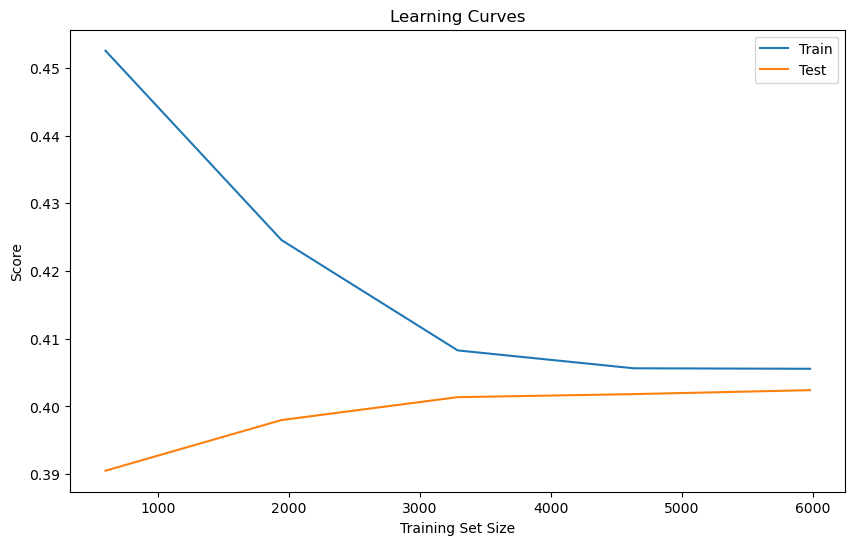

In [47]:
from sklearn.model_selection import cross_val_score, learning_curve

# Assuming 'model' is your machine learning model
cv_scores = cross_val_score(lr, X_train, y_train, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')

# Plot learning curves
train_sizes, train_scores, test_scores = learning_curve(lr, X_train, y_train, cv=5)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Train')
plt.plot(train_sizes, test_scores_mean, label='Test')
plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()
plt.show()

Based on the above graph we can say that the data is underfitting with the model.

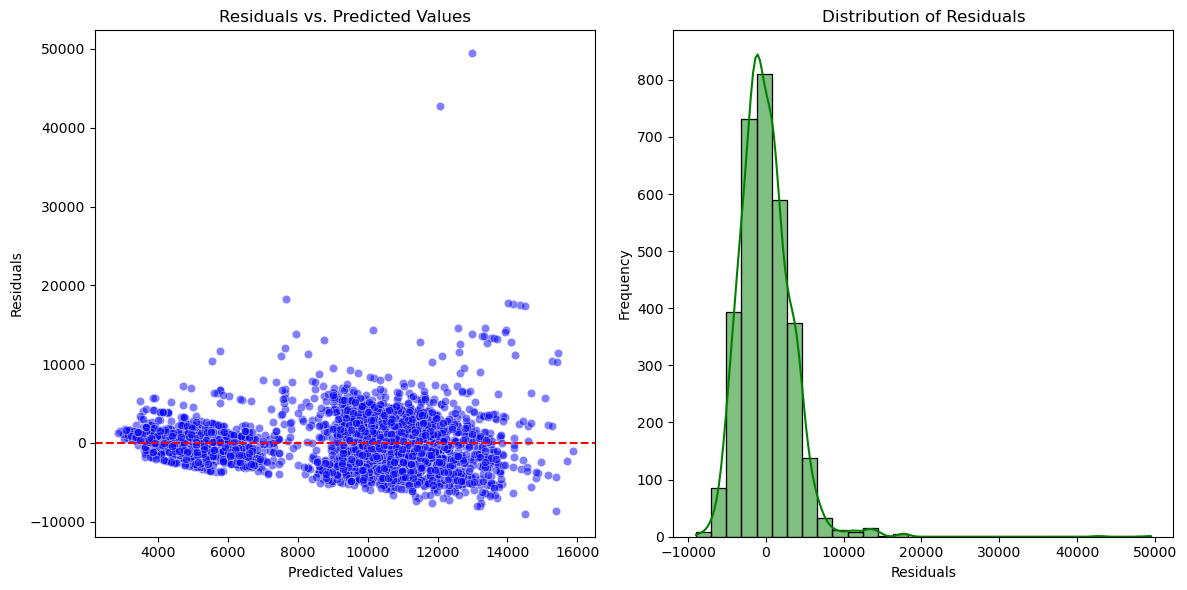

In [48]:
# Calculate residuals
residuals = y_test - lr_pred

# Create residual plots
plt.figure(figsize=(12, 6))

# Residuals vs. Predicted values
plt.subplot(1, 2, 1)
sns.scatterplot(x=lr_pred, y=residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Residuals distribution
plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=30, kde=True, color='green')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Based on the above graphs we can see only 43% of predicted values are falling on the actual values.

# XG Boosting Model

In [49]:
from xgboost import XGBRegressor

In [50]:
xgb = XGBRegressor(max_depth=10,
    n_estimators=1000,
    min_child_weight=0.5, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.1,
    seed=42)

In [51]:
xgb.fit(X_train,y_train,eval_metric="rmse",verbose=True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=0.5, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [52]:
y_predict_train = xgb.predict(X_train)
predict_xgb = xgb.predict(X_test)

In [53]:
from sklearn.metrics import explained_variance_score
print(explained_variance_score(predict_xgb,y_test))

0.7404438329769691


In [54]:
rmse = np.sqrt(mean_squared_error(y_test, predict_xgb)) #RSME
print(rmse)
print(mean_squared_error(y_test, predict_xgb))
xgb_r2_score=r2_score(y_test, predict_xgb)
print(xgb_r2_score)

2166.152564794888
4692216.933967471
0.7695667065906271


Cross-Validation Scores: [0.7692284  0.78031909 0.73479952 0.77512792 0.78353223]


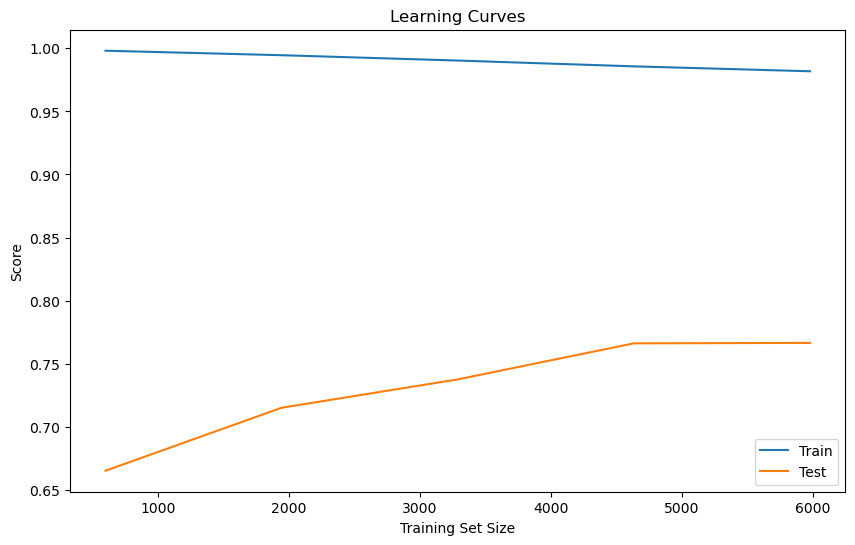

In [55]:
# Assuming 'model' is your machine learning model
cv_scores = cross_val_score(xgb, X_train, y_train, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')

# Plot learning curves
train_sizes, train_scores, test_scores = learning_curve(xgb, X_train, y_train, cv=5)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Train')
plt.plot(train_sizes, test_scores_mean, label='Test')
plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()
plt.show()

Based on the above graph the data is slightly good fitting with model.

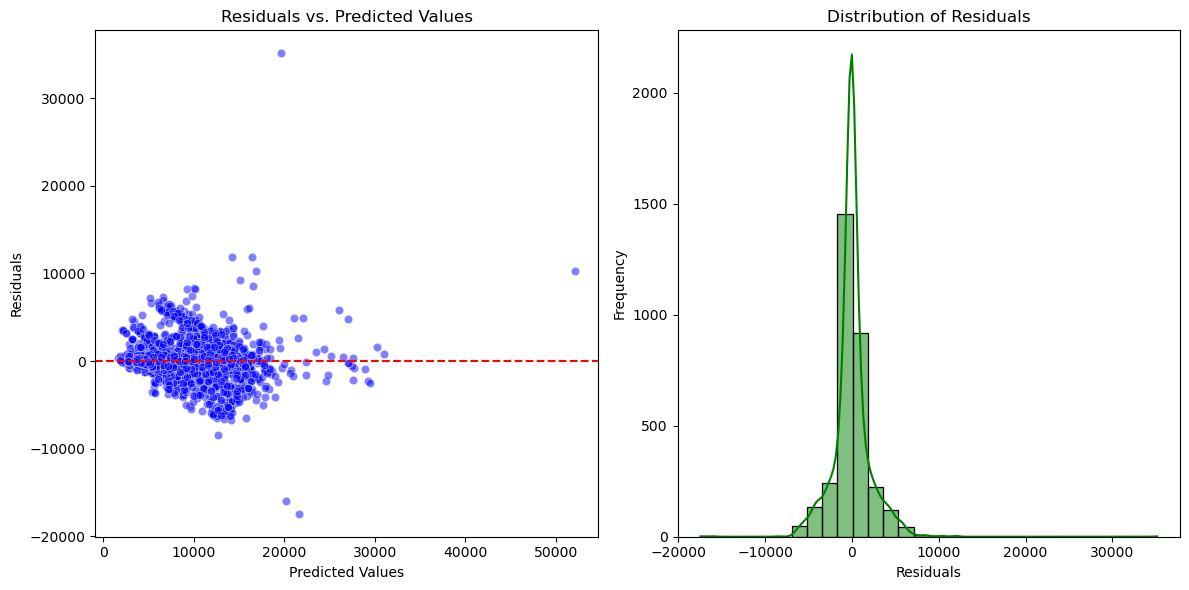

In [56]:
# Calculate residuals
residuals = y_test - predict_xgb

# Create residual plots
plt.figure(figsize=(12, 6))

# Residuals vs. Predicted values
plt.subplot(1, 2, 1)
sns.scatterplot(x=predict_xgb, y=residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Residuals distribution
plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=30, kde=True, color='green')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Based on the above graphs we can see that 76% of the predicted values are falling on the actual values.

# Decision Tree Model

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
de = DecisionTreeRegressor()

In [59]:
de.fit(X_train,y_train)

DecisionTreeRegressor()

In [60]:
de_pred = de.predict(X_test)
de_r2=r2_score(y_test,de_pred)
print(de_r2)

0.6958395859461173


Cross-Validation Scores: [0.72024452 0.55139123 0.56544476 0.5829302  0.64686378]


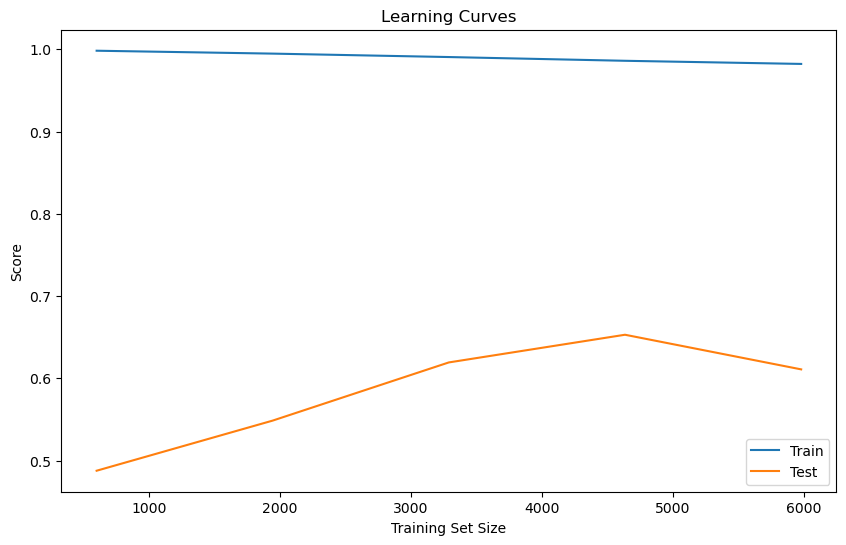

In [61]:
from sklearn.model_selection import cross_val_score, learning_curve
import matplotlib.pyplot as plt

# Assuming 'model' is your machine learning model
cv_scores = cross_val_score(de, X_train, y_train, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')

# Plot learning curves
train_sizes, train_scores, test_scores = learning_curve(de, X_train, y_train, cv=5)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Train')
plt.plot(train_sizes, test_scores_mean, label='Test')
plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()
plt.show()

Based on the above graph we can see that the data is underfitting to the model.

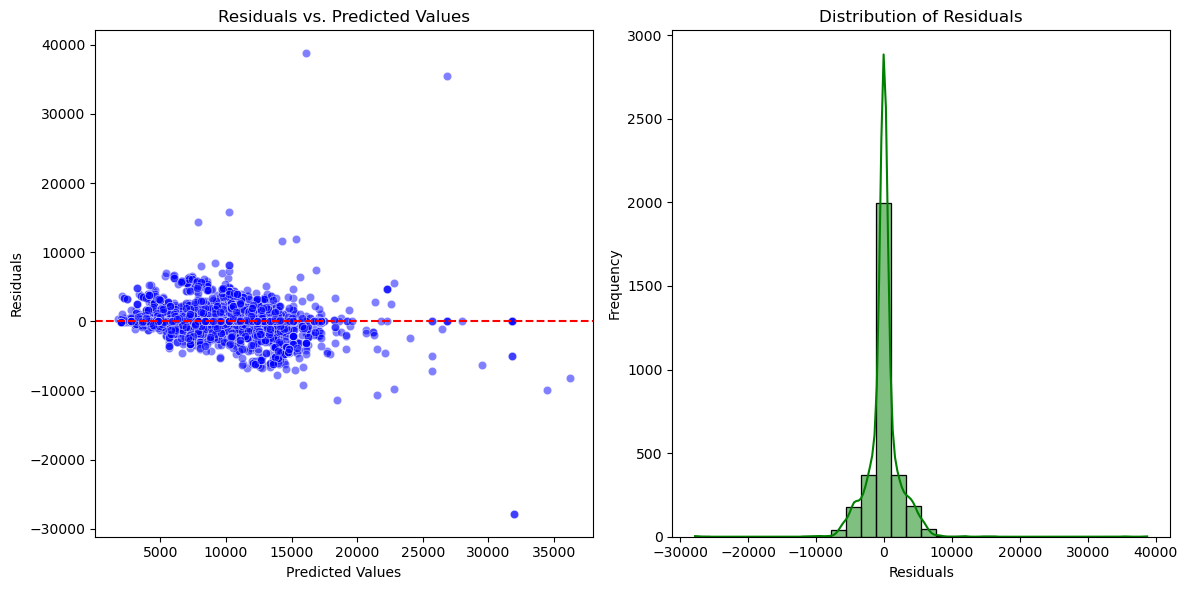

In [62]:
# Calculate residuals
residuals = y_test - de_pred

# Create residual plots
plt.figure(figsize=(12, 6))

# Residuals vs. Predicted values
plt.subplot(1, 2, 1)
sns.scatterplot(x=de_pred, y=residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Residuals distribution
plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=30, kde=True, color='green')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Based on the above graph we can see that 69% of the predicted values are falling on the actual values.

# KNN Model

In [63]:
from sklearn.neighbors import KNeighborsRegressor # regression task

In [64]:
# Initialize KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [65]:
# Predict on the test set
y_pred = knn.predict(X_test)

In [66]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 8887346.830864275


In [67]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) #RSME
print(rmse)
print(mean_squared_error(y_test, y_pred))
knn_r2_score=r2_score(y_test, y_pred)
print(knn_r2_score)

2981.1653477900677
8887346.830864275
0.5635452007595512


Cross-Validation Scores: [0.55734221 0.53624133 0.44234263 0.49828717 0.52869654]


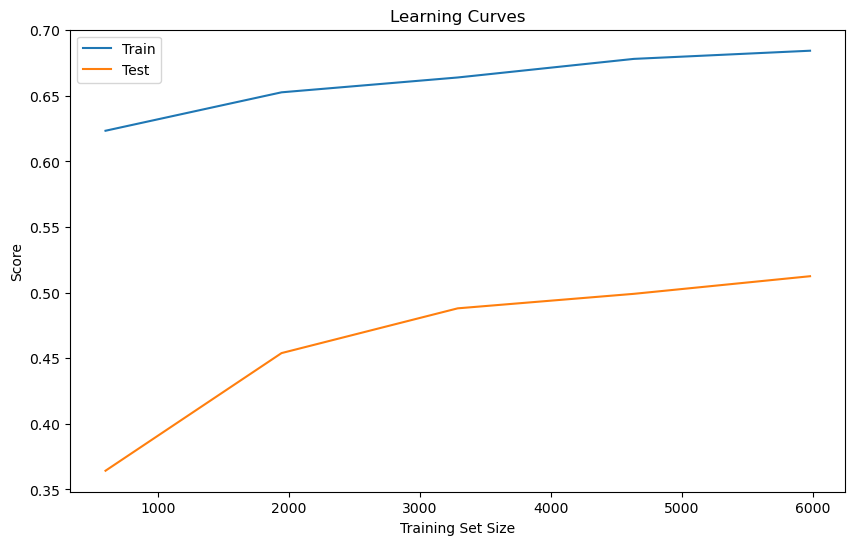

In [68]:
# Assuming 'model' is your machine learning model
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')

# Plot learning curves
train_sizes, train_scores, test_scores = learning_curve(knn, X_train, y_train, cv=5)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Train')
plt.plot(train_sizes, test_scores_mean, label='Test')
plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()
plt.show()

Based on the above graph we can see that this model is perfectly fitted with the data.

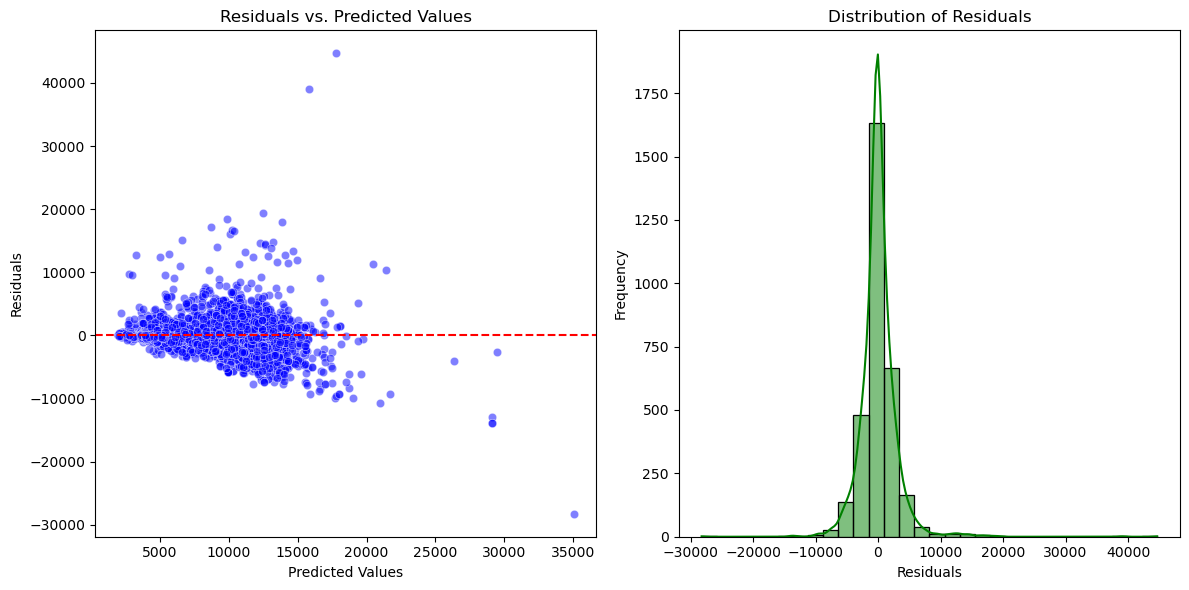

In [69]:
# Calculate residuals
residuals = y_test - y_pred

# Create residual plots
plt.figure(figsize=(12, 6))

# Residuals vs. Predicted values
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred, y=residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Residuals distribution
plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=30, kde=True, color='green')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Based on the above graphs we can see that 56% of predicted values are falling on the actual values.

# Random Forest Model

In [70]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [71]:
rf_pred = rf.predict(X_test) 
rf_r2=r2_score(y_test,rf_pred)
print(rf_r2)

0.794707311319903


### Hyperparameter tuning

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [74]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [75]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_absolute_error')

In [76]:
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [77]:
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

In [78]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, Y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 1159.2228426186791


In [79]:
rf_r2_score = r2_score(y_test, Y_pred)
print(f'R-squared Score for Best Model: {rf_r2_score}')

R-squared Score for Best Model: 0.8136795089454375


Cross-Validation Scores: [0.79120755 0.79969512 0.76147703 0.77019036 0.76313004]


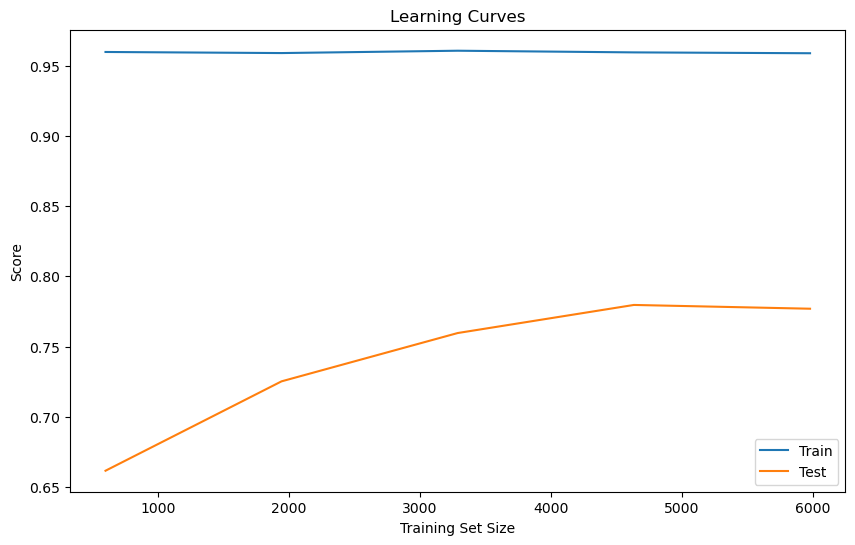

In [80]:
from sklearn.model_selection import cross_val_score, learning_curve
import matplotlib.pyplot as plt

# Assuming 'model' is your machine learning model
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')

# Plot learning curves
train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=5)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Train')
plt.plot(train_sizes, test_scores_mean, label='Test')
plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()
plt.show()

Based on the above graph we can say that the model is fitting the data perfectly.

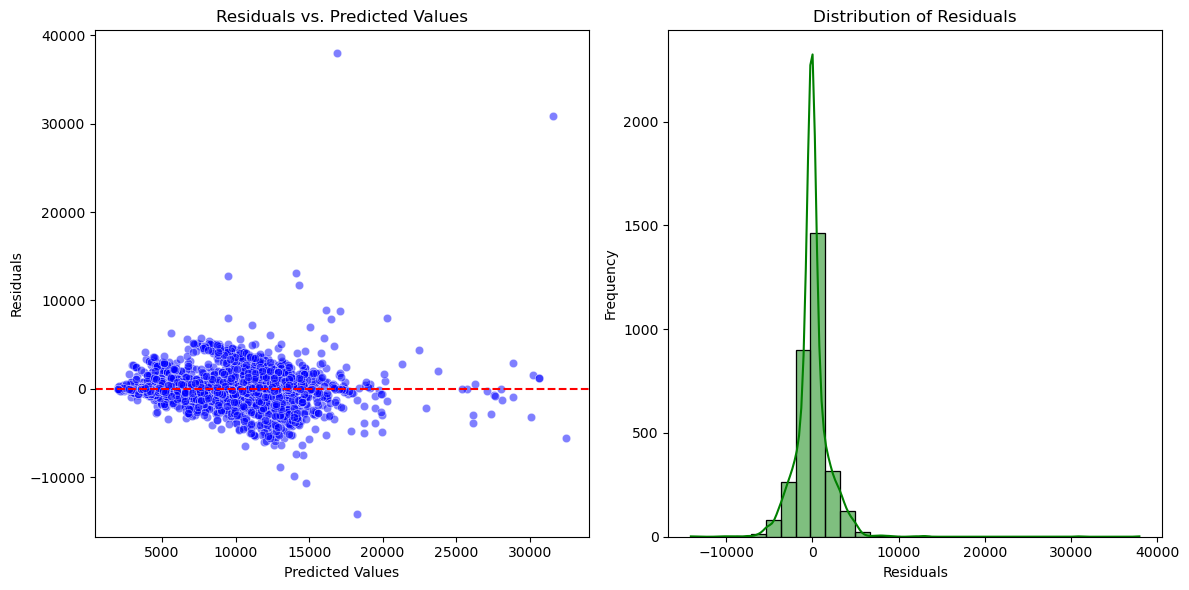

In [81]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Create residual plots
plt.figure(figsize=(12, 6))

# Residuals vs. Predicted values
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred, y=residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Residuals distribution
plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=30, kde=True, color='green')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Based on the above graphs 81% of the predicted values are falling on the actual values.

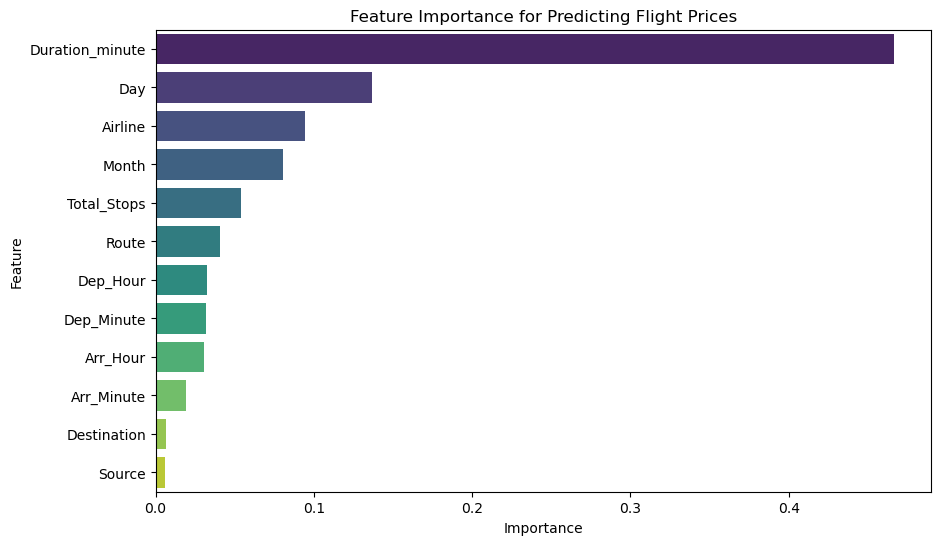

In [82]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
# Get feature importances from the trained model
feature_importances = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Predicting Flight Prices')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Based on this graph we can see that Duration is the most important feature for this data.

# Lasso Model

In [83]:
from sklearn.linear_model import Lasso

In [84]:
las = Lasso()
las.fit(X_train, y_train)

Lasso()

In [85]:
y_pred = las.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Display the coefficients of the features
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': las.coef_})
print(coefficients)

Mean Absolute Error: 2485.571925234601
            Feature  Coefficient
0           Airline    52.761279
1            Source  -271.359761
2       Destination   287.397869
3             Route    -3.806465
4       Total_Stops -1211.679634
5               Day   -73.330507
6             Month   -78.246534
7          Dep_Hour    22.795679
8        Dep_Minute    -4.070469
9          Arr_Hour   -16.559550
10       Arr_Minute     1.095305
11  Duration_minute     2.372219


In [86]:
las_pred = las.predict(X_test) 
las_r2_score=r2_score(y_test,las_pred)
print(las_r2_score)

0.4339183616397875


Cross-Validation Scores: [0.42340257 0.4205734  0.3539766  0.40930586 0.40475877]


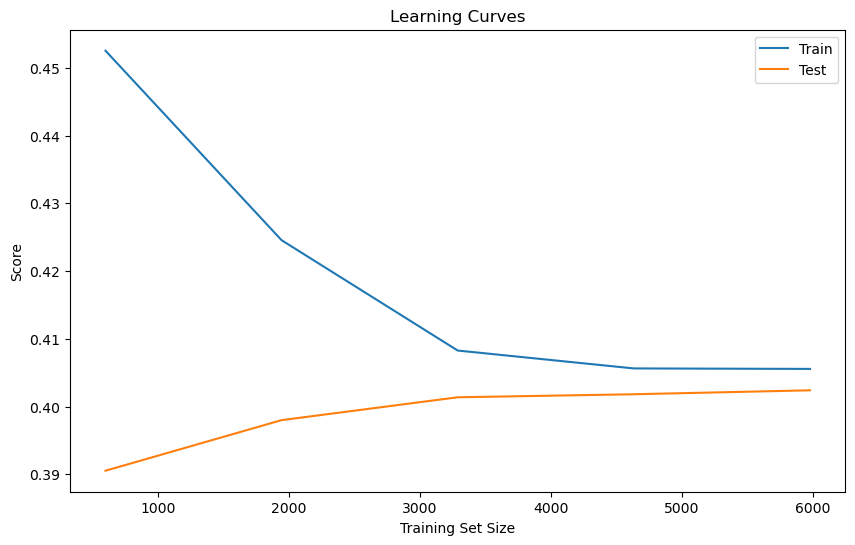

In [87]:
# Assuming 'model' is your machine learning model
cv_scores = cross_val_score(las, X_train, y_train, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')

# Plot learning curves
train_sizes, train_scores, test_scores = learning_curve(las, X_train, y_train, cv=5)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Train')
plt.plot(train_sizes, test_scores_mean, label='Test')
plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()
plt.show()

Based on the above graph the data is underfitting with the data.

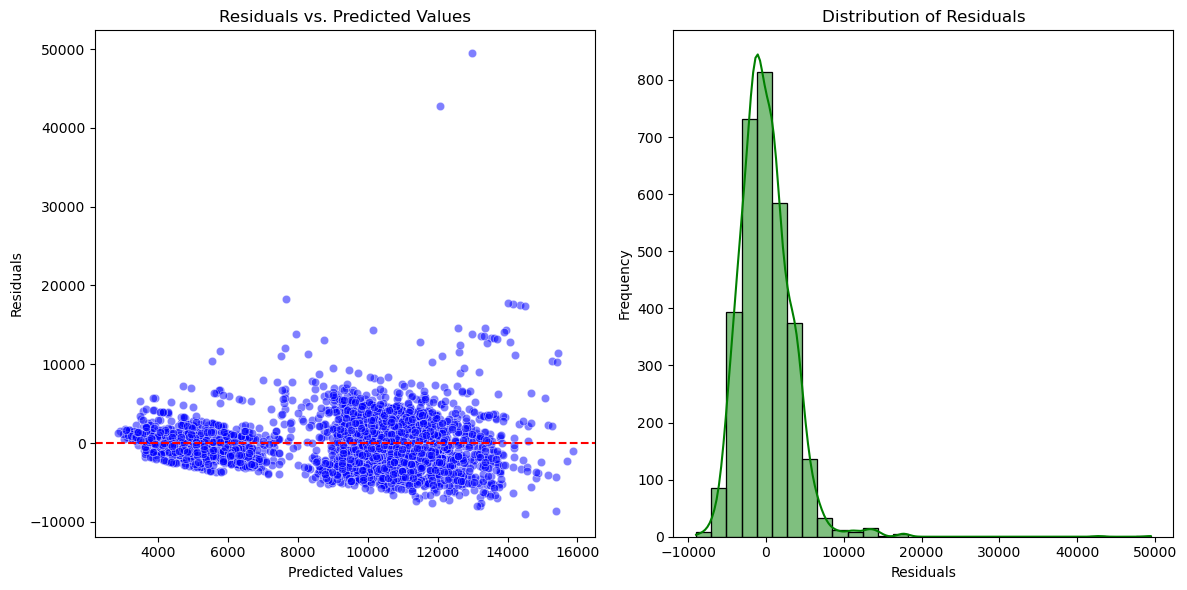

In [88]:
# Calculate residuals
residuals = y_test - las_pred

# Create residual plots
plt.figure(figsize=(12, 6))

# Residuals vs. Predicted values
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred, y=residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Residuals distribution
plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=30, kde=True, color='green')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Based on the above graphs we can see that 43% of the predicted values are falling on the actual values.

# Visualisation Based on Algorithms

In [89]:
scores=[lr_r2_score,xgb_r2_score,de_r2,knn_r2_score,rf_r2_score,las_r2_score]
algorithms=['LinearRegression','XG Boosting','DecisionTree','KNN','RandomForest','Lasso']
for i in range(len(algorithms)):
    print("The R2 Score acheived using " + algorithms[i] + ' is: ' + str(scores[i])+"%")

The R2 Score acheived using LinearRegression is: 0.4339082882621682%
The R2 Score acheived using XG Boosting is: 0.7695667065906271%
The R2 Score acheived using DecisionTree is: 0.6958395859461173%
The R2 Score acheived using KNN is: 0.5635452007595512%
The R2 Score acheived using RandomForest is: 0.8136795089454375%
The R2 Score acheived using Lasso is: 0.4339183616397875%


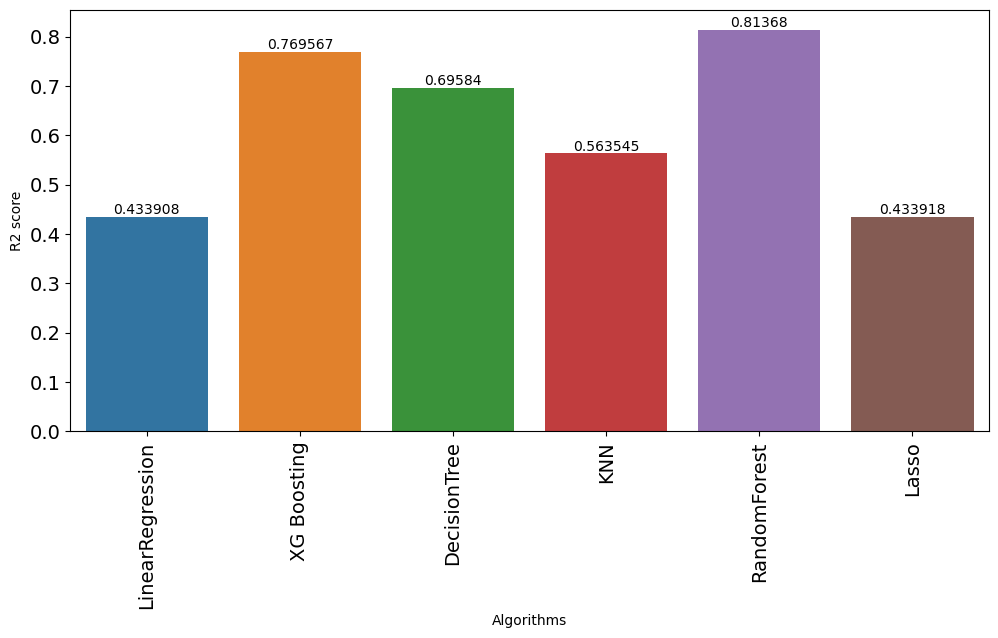

In [90]:
# plotting the barplot between algoriths and their r2_scores
plt.figure(figsize=(10,6))
plt.xlabel("Algorithms")
plt.ylabel("R2 score")
ax=sns.barplot(x=algorithms,y=scores)
for label in ax.containers:
    ax.bar_label(label)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.tick_params(labelsize=14)

# Report/Conclusion

**Data Analysis Report for Flight Fare Prediction**

**Problem Statement:**
Flight ticket prices are notoriously unpredictable, and this project aims to leverage machine learning to address this issue. The goal is to assist both airlines in determining optimal pricing and customers in predicting future flight prices for better journey planning.

**Task 1: Data Analysis**
1. **Data Overview:**
   - Explored dataset dimensions, structure, and data types.
   - Checked for null values; fortunately, the dataset have some missing values and we dropped them
   - Checked basic statistics using the describe() function.
   - There are minimum number of duplicated values in the given dataset,we didnt remove them because they can effect our score        for our models.

2. **Data Cleaning:**
   - Categorical columns were encoded using LabelEncoder.
   - We extracted 'Day' & 'Month' from "Date_of_Journey" column, 'Dep_Hour' & 'Dep_Minute' from "Dep_Time" column, 'Arr_Hour' &      'Arr_Minute' from "Arrival_Time" column. And we converted 'Duration' into "Duration_Minute".
   - Checked for skewness and kurtosis in the 'Price' column, indicating positive skewness and kurtosis.

3. **Exploratory Data Analysis (EDA):**
   - Utilized various visualizations to gain insights.
   - Heatmap revealed no strong correlation between features and the target variable ('Price').
   - Explored distributions, relationships, and trends in features.

4. **Insights from Visualizations:**
   - Analyzed airline, source, destination, route, total stops, and additional info.
   - Examined the distribution of flight prices based on various factors.
   - Explored route information, identifying popular and less common routes.
   - Noted trends in total stops, with 1-stop flights being the most common.

5. **Time Analysis:**
   - Analyzed departure and arrival times, identifying peak departure times and evening arrival trends.

6. **Price Analysis:**
   - Explored the impact of various features on flight prices using bar plots.
   - Identified routes, airlines, and additional info influencing prices.

**Task 2: Predictive Model**
1. **Feature Engineering:**
   - Extracted insights from the date of the journey.
   - Used visuals to understand the distribution of flight prices over time.

2. **Model Building:**
   - Scaled numerical features using standard scaling.
   - Split data into training and testing sets.
   - Applied various regression models: Linear Regression, XG Boost, Decision Tree, KNN, Random Forest and Lasso.

3. **Model Evaluation:**
   - Evaluated models based on R2 scores.
   - Achieved highest R2 score of 81% using Random Forest after hyperparameter tuning.

4. **Feature Importance:**
   - Visualized feature importance based on the Random Forest model.

5. **Predicted vs. Actual Visualizations:**
   - Plotted predicted vs. actual prices for model evaluation.

**Conclusion:**
The predictive model, particularly the Random Forest algorithm, demonstrated promising results with an R2 score of 81%. This model can be further fine-tuned and deployed for predicting flight prices, benefiting both airlines and customers in making informed decisions. The EDA insights provide valuable information on factors influencing flight prices, aiding in strategic decision-making.